In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options

In [13]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [3]:
url = "https://www.baseball-reference.com/boxes/?month={month}&day={day}&year={year}"

In [4]:
options = Options()
options.add_argument('--headless')
options.add_argument('--disable-gpu')  # Last I checked this was necessary.
driver = webdriver.Chrome(options=options)

In [5]:
start_date = datetime.datetime(2021,5,1)
as_of_date = start_date

In [6]:
dct = {}
while as_of_date < datetime.datetime(2021, 10, 1):
    as_of_date = as_of_date + datetime.timedelta(1)
    dct[as_of_date]=None
    for year in range(2019,2000, -1):
        #print(as_of_date, year)
        try:
            driver.get(url.format(month=as_of_date.month, 
                                   day=as_of_date.day, 
                                   year=year)
                      )
            e = driver.find_element(By.XPATH, "//*[@id='standings-upto-NL-E']/tbody/tr/th")
            if e.text=='NYM':
                dct[as_of_date]=year
                break
        except:
            pass

In [7]:
df = pd.DataFrame(dct.items(), columns=['Date', 'Last Year In First Place'])

In [8]:
df.to_pickle('mets_first_place.pkl')

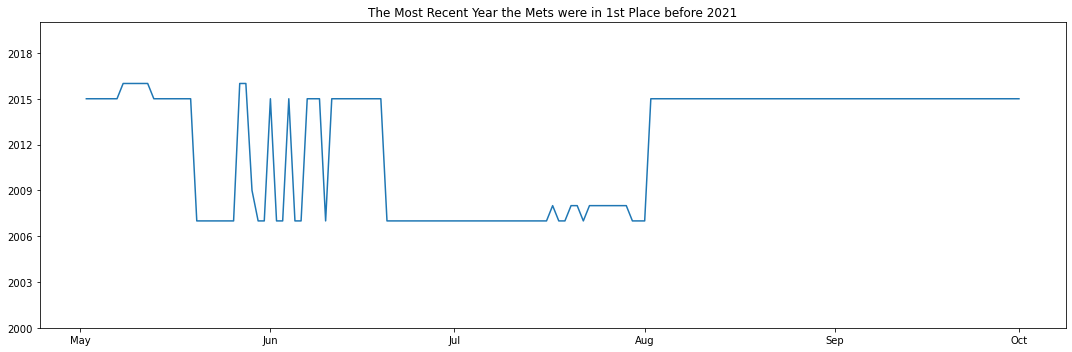

In [21]:
fig, ax = plt.subplots(1,1,figsize=(15,5))
ax.plot(df['Date'], df['Last Year In First Place'])
ax.set_title('The Most Recent Year the Mets were in 1st Place before 2021')
myFmt = mdates.DateFormatter('%b')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylim(2000, 2020)
ax.set_yticks(np.arange(2000, 2020, 3));
fig.tight_layout()
fig.savefig('mets_first_place.jpg', bbox_inches="tight")

In [25]:
df[35:50]

,Date,Last Year In First Place
35,2021-06-06,2007
36,2021-06-07,2015
37,2021-06-08,2015
38,2021-06-09,2015
39,2021-06-10,2007
40,2021-06-11,2015
41,2021-06-12,2015
42,2021-06-13,2015
43,2021-06-14,2015
44,2021-06-15,2015


Scrap

In [ ]:
e = driver.find_element(By.XPATH, "//*[@id='standings-upto-NL-E']/tbody/tr/th")
first_place_team = e.text